# Example notebook for microRNA metagene analysis

In [1]:
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt

# Load encode metadata
I have precompiled list of uID and the .bam, .bigWig files in the following dataframe.

In [2]:
# load IDs
encode_data = pd.read_pickle('~/projects/eclip_encode_id.pickle')
eclip_bam = pd.read_csv('/home/hsher/projects/RBP_annot/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

# join data
encode_data = pd.merge(eclip_bam[['uID', 'RBP', 'Cell line']], encode_data, left_on = ['RBP', 'Cell line'], right_on = ['RBP', 'cell_line'])

# Find miRNA transcripts and build `Metagene()`
Prebuild `Metagene` objects. Each metagene object contains the chrom, start, end, strand as well as the feature regions. In microRNA class there are new attributes such as the `5p_duplex` (5 prime duplex) and `3p_duplex`.

A `Metagene` Object is just a data type that stores all the gencode annotation and make it easy for us to extract values from eCLIP (or other experimental data).

1 `Metagene` object will contain 1 miRNA.

In [3]:
miRNA_transcript = transcript.filter(lambda x: x.attrs['transcript_type'] == 'miRNA').saveas()
print(len(miRNA_transcript))


1879


In [4]:
# This function automatically builds all the miR gene's metagenes (and store the metagenes in a list)
mir_metagenes = Build_many_miRNA()
# precursor RNA already

# Load experiment data into object `eCLIP()`
example is ENCODE eCLIP data.

In [5]:
# this dataframe just documents the file names for DKC
encode_data.loc[(encode_data['RBP'] == 'DKC1')]

,uID,RBP,Cell line,bam_0,minus_0,plus_0,bam_1,minus_1,plus_1,control experiment,cell_line,bam_control,minus_control,plus_control
124,544,DKC1,HepG2,ENCFF732TFX.bam,ENCFF163AYZ.bigWig,ENCFF099IRI.bigWig,ENCFF252TQP.bam,ENCFF502GTY.bigWig,ENCFF192FMW.bigWig,ENCSR197LHH,HepG2,ENCFF038LJH.bam,ENCFF742BDR.bigWig,ENCFF144DTF.bigWig


#

In [6]:
# and this internal function loads all the .bam, .bw, .bed into the eCLIP object
DICER = eCLIP()
DICER.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'DGCR8')&(encode_data['Cell line'] == 'HepG2')])

finding negative/positive examples


In [7]:
DROSHA = eCLIP()
DROSHA.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'DROSHA')&(encode_data['Cell line'] == 'HepG2')])

finding negative/positive examples


In [8]:
LIN28B = eCLIP()
LIN28B.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'LIN28B')&(encode_data['Cell line'] == 'HepG2')])

finding negative/positive examples


In [9]:
DKC1 = eCLIP()
DKC1.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'DKC1')&(encode_data['Cell line'] == 'HepG2')])

finding negative/positive examples


In [10]:
SF3B4 = eCLIP()
SF3B4.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'SF3B4')&(encode_data['Cell line'] == 'HepG2')])

finding negative/positive examples


In [11]:
PRPF8 = eCLIP()
PRPF8.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'PRPF8')&(encode_data['Cell line'] == 'HepG2')])

finding negative/positive examples


In [12]:
HNRNPK = eCLIP()
HNRNPK.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'HNRNPK')&(encode_data['Cell line'] == 'HepG2')])

finding negative/positive examples


# Building `Metadensity()`
you need to specify which RBP (experimental objext) and which genes (metagene or transcript) you want to look at. And then Metadensity will calcaulte stuffs for you.
1. experimental object `eCLIP()`: the read coverage comes from there
2. a list of metagene `metagenes = metagenes` OR a list of transcripts `miRNA_transcripts` in BedTools format.

To configure they type of background method:
`background_method = 'relative information'` or `subtract`

You can decide not to normalize by `normalize=False`


In [13]:
def build_idr_metadensity(eCLIP, metagenes = mir_metagenes):
    ''' build metadensity object for eCLIP and its IDR containing transcript'''
    # find transcript with enriched feature

    # bed concat makes strand broken!!! BUG BUG BUG
       
    m = Metadensity(eCLIP, miRNA_transcript, eCLIP.name, metagenes = metagenes, background_method = 'relative information', normalize = False)
    m.get_density_array() # this will getch the values from eCLIP and store in the density array
    return m

In [14]:
metas = []
for e in [DICER, DROSHA, SF3B4, LIN28B, DKC1, PRPF8, HNRNPK]:
    metas.append(build_idr_metadensity(e))

# Visualize RBP map: individual density per transcript

In [15]:
# import plotting module
from metadensity.plotd import *

# decide the sequence of feature you want
mirna=['5p_duplex', 'hairpin', 'mature', '3p_duplex']

## Mean density across many miRNAs

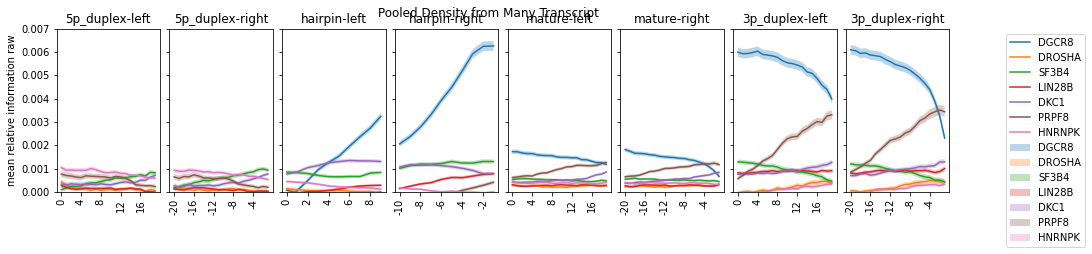

In [16]:
# plot mean density for a list of Metadensities (each for 1 RBP)
f=plot_mean_density(metas, stat = 'mean', features_to_show = mirna, ymax = 0.007)

# Looking at truncation sites is similar

In [ ]:
def build_idr_metatruncate(eCLIP, metagenes = mir_metagenes):
    ''' build metadensity object for eCLIP and its IDR containing transcript'''
    # find transcript with enriched feature

       
    m = Metatruncate(eCLIP, miRNA_transcript, eCLIP.name, metagenes = metagenes, background_method = 'relative information', normalize = False)
    m.get_density_array(use_truncation = True)
    return m
truns = []
for e in [DICER, DROSHA, SF3B4, PRPF8, HNRNPK]:
    truns.append(build_idr_metatruncate(e))

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity-0.0.1-py3.7.egg/metadensity/plotd.py:152: RuntimeWarning: Mean of empty slice


Text(0.5, 0.98, 'miRNA Metatruncation')

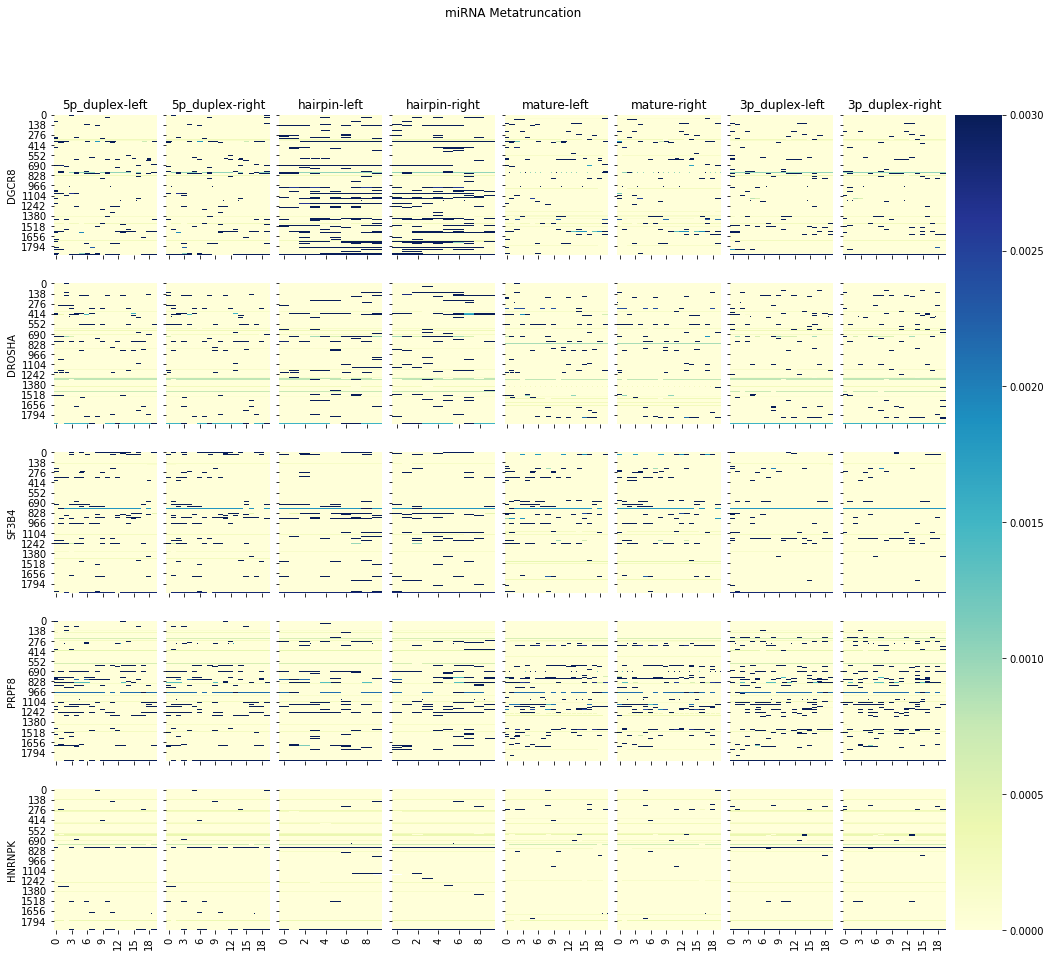

In [21]:
# RBP map allows you to look at individual RNA
plot_rbp_map(truns, features_to_show = mirna, ymax = 0.003)
plt.suptitle('miRNA Metatruncation')

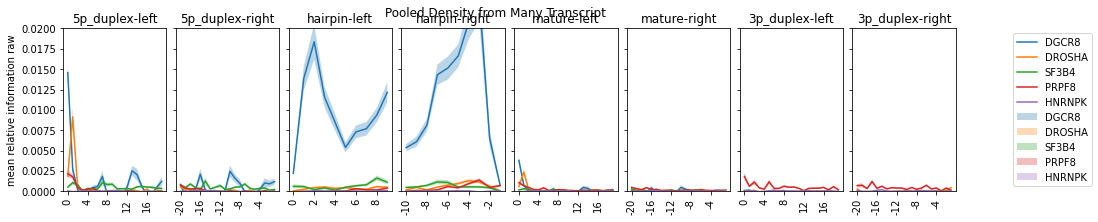

In [22]:
f=plot_mean_density(truns, stat = 'mean', features_to_show = mirna, ymax = 0.02)

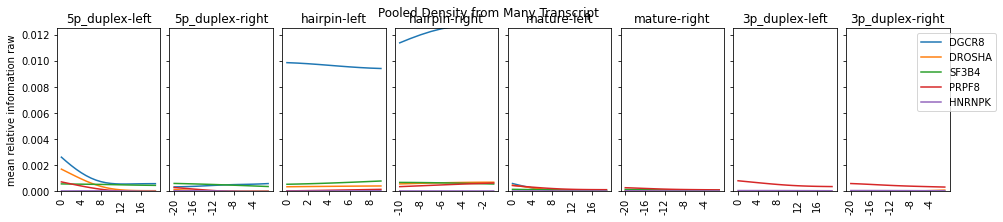

In [23]:
f=plot_mean_density(truns, stat = 'mean', features_to_show = mirna, ymax = 0.0125, smooth = True)